<a href="https://colab.research.google.com/github/kimchaeyoung-student/pdm04/blob/master/py-tensorflow/tf2_2_mnist_ML_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras example: mnist analysis by simple NN

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.3.0


In [26]:
# load dataset
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [27]:
# summarize loaded dataset
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


38345


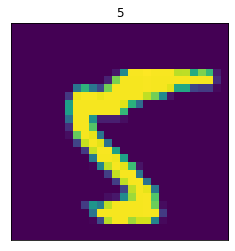

In [28]:
# display one random image from the training set:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

### Show images of numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


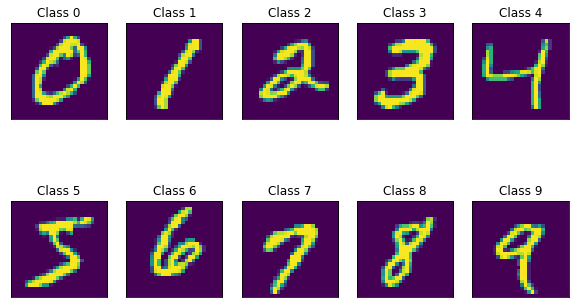

In [29]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])


### 데이터를 float 타입으로 바꾸고 스케일링한다.
- 2차원 영상을 1차원 벡터로 변환
- (28,28) => (784,)
- Scaling: (0 ~ 255)/255.0

In [30]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(60000, 784) float32
(10000, 784) float32


In [31]:
print(X_train0.shape, X_train.shape)

(60000, 28, 28) (60000, 784)


### y 데이터는 One-Hot-Encoding 을 한다.

In [32]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [33]:
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

> One-Hot-Encoding을 하는 이유
- 머신러닝의 목표가 특정 숫자 그림의 숫자를 정확하게 맞추는 것이 아니다.
    1. 일단, 0에서 9까지의 숫자로 판단될 10개의 확률을 계산한다.
    2. 그리고 특정 숫자로 판단될 확률이 제일 큰 수로 결정한다.
- 3개 이상의 클래스를 구분하는 지도학습의 경우 One-Hot-Encoding은 필요한 과정이다.

***

## ML of mnist
- ML classifier 선택
    * SGDClassifier
- fit 메서드로 트레이닝 (ML)

### SGD classifier

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

model = OneVsOneClassifier(SGDClassifier(max_iter=100, random_state=42))
model.fit(X_train, y_train0)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=100,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

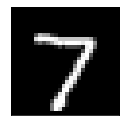

In [35]:
# Select the first number in testset
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
X_test.shape

(10000, 784)

In [37]:
# Predict the first number in testset using ML model
model.predict(X_test[:1, :])

array([7], dtype=uint8)

In [38]:
y_test0[0]

7

### 테스트 데이터에 대한 예측 정확도 계산 

In [39]:
y_pred = model.predict(X_test)
y_pred.shape

(10000,)

In [40]:
t_count = np.sum(y_pred == y_test0) # True positive
f_count = np.sum(y_pred != y_test0) # False positive
f_count==10000-t_count

True

In [41]:
t_count,f_count

(9313, 687)

In [42]:
accuracy = t_count/len(y_test)*100
accuracy

93.13

### Accuracy of predicting test numbers is around 93% in ML using SGD classifier.

In [43]:
np.nonzero(y_pred == y_test0)  # return tuple

(array([   0,    1,    2, ..., 9997, 9998, 9999]),)

In [44]:
np.nonzero(y_pred != y_test0)

(array([   8,   66,  124,  151,  166,  210,  241,  245,  247,  259,  291,
         305,  308,  318,  320,  321,  340,  344,  352,  362,  372,  381,
         391,  403,  412,  425,  443,  445,  464,  478,  479,  495,  502,
         507,  532,  536,  538,  543,  545,  565,  569,  571,  578,  582,
         583,  591,  628,  629,  659,  684,  691,  692,  707,  712,  713,
         714,  717,  720,  740,  791,  800,  810,  844,  857,  866,  874,
         877,  881,  882,  896,  916,  939,  950,  956,  959,  965,  975,
         992,  999, 1003, 1012, 1014, 1017, 1039, 1044, 1062, 1082, 1101,
        1107, 1112, 1114, 1119, 1128, 1157, 1182, 1192, 1198, 1200, 1202,
        1206, 1226, 1232, 1234, 1242, 1247, 1248, 1253, 1260, 1283, 1299,
        1310, 1319, 1326, 1331, 1337, 1364, 1378, 1393, 1404, 1413, 1433,
        1440, 1444, 1453, 1466, 1467, 1468, 1470, 1494, 1500, 1522, 1525,
        1530, 1545, 1549, 1553, 1559, 1575, 1584, 1587, 1601, 1607, 1609,
        1621, 1626, 1634, 1637, 1640, 

In [45]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(y_pred == y_test0)[0]
incorrect_indices = np.nonzero(y_pred != y_test0)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


9313  classified correctly
687  classified incorrectly


In [46]:
len(correct_indices)/len(y_test)*100

93.13

### [DIY: 설명]
> 정확하게 예측한 9개와 틀리게 예측한 9개를 아래에 출력한다.

In [47]:
correct_indices[:9], incorrect_indices[:9]

(array([0, 1, 2, 3, 4, 5, 6, 7, 9]),
 array([  8,  66, 124, 151, 166, 210, 241, 245, 247]))

Text(0.5, 0.98, 'First 9 correct and incorrect predictions')

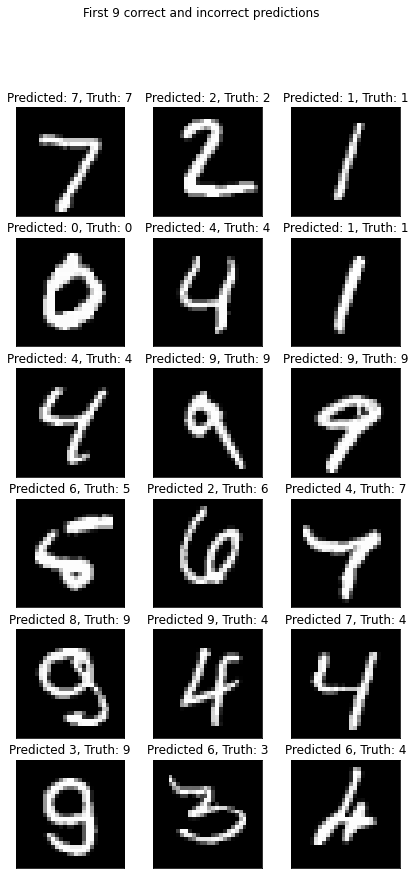

In [48]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(y_pred[correct],
                                        y_test0[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(y_pred[incorrect], 
                                       y_test0[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.suptitle('First 9 correct and incorrect predictions')